In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve


from tensorflow import keras
from keras.models import Sequential # sequential networks= all the layers are one after the others
from keras.layers import Dense # we have flat layes 
from scikeras.wrappers import KerasClassifier

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2, l1
from keras.layers import Dropout
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2, l1
from keras.layers import Dropout
from keras.regularizers import l2, l1
from keras.models import load_model

In [4]:
#Read datasets
df_train=pd.read_csv("../Dataset_prepared/Prepared_train.csv")
df_test=pd.read_csv("../Dataset_prepared/Prepared_test.csv")

#Drop useless features
df_train.drop('actor',axis=1,inplace=True)
df_train.drop('filename',axis=1,inplace=True)
df_test.drop('actor',axis=1,inplace=True)
df_test.drop('filename',axis=1,inplace=True)

#LabelEncode categorical features
le=preprocessing.LabelEncoder()
c = df_train.select_dtypes(include=['object']).columns.tolist()
for i in c:
    df_train[i]=le.fit_transform(df_train[i])

for i in c:
    df_test[i]=le.fit_transform(df_test[i])

#Normalize pure numeric features 
scaler = StandardScaler()
numeric_features = [n for n in df_train.columns if n!="emotion" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and n!="filename" and n!="actor"]
scaled_features = scaler.fit_transform(df_train[numeric_features])
df_train[numeric_features] = scaled_features
scaled_features_test = scaler.transform(df_test[numeric_features])
df_test[numeric_features] = scaled_features_test

#Set X_train,y_train = data to fit models. Set X_test,y_test = data to test models.
col=[x for x in df_train.columns if x!="emotion"]
X_train=df_train[col].values
y_train = np.array(df_train["emotion"])
X_test=df_test[col].values
y_test = np.array(df_test["emotion"])

In [3]:
n_classes = 8
def build_model1():
    n_feature = X_train.shape[1] # numero colonne
    model = Sequential()
    model.add(Dense(512, input_dim=n_feature, activation='relu')) 
    model.add(Dense(64, activation='relu'))# second layer
    model.add(Dense(n_classes, activation='softmax'))
    # if we have multiclass u have to specify as output the number of classes
    model.compile(loss='sparse_categorical_crossentropy', # compile=build the network. if binary classification use binary_crossentropy as loss fucntions
                  optimizer="adam", metrics=['accuracy']) # metric u want to observe -> typically accuracy,f1 score
    return model

n_classes = 8
def build_model2():
    n_feature = X_train.shape[1] # numero colonne
    model = Sequential()
    model.add(Dense(512, input_dim=n_feature, activation='tanh')) 
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    # if we have multiclass u have to specify as output the number of classes
    model.compile(loss='sparse_categorical_crossentropy', # compile=build the network. if binary classification use binary_crossentropy as loss fucntions
                  optimizer="adam", metrics=['accuracy']) # metric u want to observe -> typically accuracy,f1 score
    return model

n_classes = 8
def build_model3():
    n_feature = X_train.shape[1] # numero colonne
    model = Sequential()
    model.add(Dense(1024, input_dim=n_feature, activation='tanh')) 
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    # if we have multiclass u have to specify as output the number of classes
    model.compile(loss='sparse_categorical_crossentropy', # compile=build the network. if binary classification use binary_crossentropy as loss fucntions
                  optimizer="adam", metrics=['accuracy']) # metric u want to observe -> typically accuracy,f1 score
    return model

n_classes = 8
def build_model4():
    n_feature = X_train.shape[1] # numero colonne
    model = Sequential()
    model.add(Dense(512, input_dim=n_feature, activation='relu')) 
    model.add(Dense(512, activation='relu'))# second layer
    model.add(Dense(n_classes, activation='softmax'))
    # if we have multiclass u have to specify as output the number of classes
    model.compile(loss='sparse_categorical_crossentropy', # compile=build the network. if binary classification use binary_crossentropy as loss fucntions
                  optimizer="adam", metrics=['accuracy']) # metric u want to observe -> typically accuracy,f1 score
    return model

n_classes = 8
def build_model5():
    n_feature = X_train.shape[1] # numero colonne
    model = Sequential()
    model.add(Dense(512, input_dim=n_feature, activation='relu')) 
    model.add(Dense(n_feature, activation='relu'))# second layer
    model.add(Dense(n_classes, activation='softmax'))
    # if we have multiclass u have to specify as output the number of classes
    model.compile(loss='sparse_categorical_crossentropy', # compile=build the network. if binary classification use binary_crossentropy as loss fucntions
                  optimizer="adam", metrics=['accuracy']) # metric u want to observe -> typically accuracy,f1 score
    return model

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.calibration import CalibratedClassifierCV
from catboost import CatBoostClassifier

In [22]:
clf = CatBoostClassifier() # convert all features in categorical but its the same then 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

Learning rate set to 0.081599
0:	learn: 2.0430001	total: 71ms	remaining: 1m 10s
1:	learn: 2.0004478	total: 139ms	remaining: 1m 9s
2:	learn: 1.9598452	total: 208ms	remaining: 1m 9s
3:	learn: 1.9246246	total: 280ms	remaining: 1m 9s
4:	learn: 1.8925424	total: 350ms	remaining: 1m 9s
5:	learn: 1.8627236	total: 416ms	remaining: 1m 8s
6:	learn: 1.8377045	total: 482ms	remaining: 1m 8s
7:	learn: 1.8106543	total: 551ms	remaining: 1m 8s
8:	learn: 1.7798500	total: 618ms	remaining: 1m 8s
9:	learn: 1.7573037	total: 686ms	remaining: 1m 7s
10:	learn: 1.7323822	total: 755ms	remaining: 1m 7s
11:	learn: 1.7128737	total: 827ms	remaining: 1m 8s
12:	learn: 1.6916395	total: 896ms	remaining: 1m 8s
13:	learn: 1.6699127	total: 963ms	remaining: 1m 7s
14:	learn: 1.6512518	total: 1.04s	remaining: 1m 8s
15:	learn: 1.6299627	total: 1.11s	remaining: 1m 8s
16:	learn: 1.6083630	total: 1.18s	remaining: 1m 8s
17:	learn: 1.5924567	total: 1.25s	remaining: 1m 8s
18:	learn: 1.5708526	total: 1.32s	remaining: 1m 8s
19:	learn: 

In [23]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(624, 8)

In [24]:
from itertools import combinations

pair_list = list(combinations(np.unique(y_train) , 2))
print(pair_list)
y_score =  clf.fit(X_train, y_train).predict_proba(X_test)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 4), (3, 5), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7), (5, 6), (5, 7), (6, 7)]
Learning rate set to 0.081599
0:	learn: 2.0430001	total: 69ms	remaining: 1m 8s
1:	learn: 2.0004478	total: 136ms	remaining: 1m 7s
2:	learn: 1.9598452	total: 204ms	remaining: 1m 7s
3:	learn: 1.9246246	total: 271ms	remaining: 1m 7s
4:	learn: 1.8925424	total: 341ms	remaining: 1m 7s
5:	learn: 1.8627236	total: 410ms	remaining: 1m 7s
6:	learn: 1.8377045	total: 482ms	remaining: 1m 8s
7:	learn: 1.8106543	total: 553ms	remaining: 1m 8s
8:	learn: 1.7798500	total: 623ms	remaining: 1m 8s
9:	learn: 1.7573037	total: 694ms	remaining: 1m 8s
10:	learn: 1.7323822	total: 765ms	remaining: 1m 8s
11:	learn: 1.7128737	total: 844ms	remaining: 1m 9s
12:	learn: 1.6916395	total: 914ms	remaining: 1m 9s
13:	learn: 1.6699127	total: 983ms	remaining: 1m 9s
14:	learn: 1.6512518	total: 1.06s	remainin

In [25]:
from sklearn.metrics import roc_auc_score

macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-REST ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Macro-averaged One-vs-REST ROC AUC score:
0.89


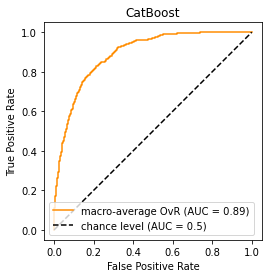

In [26]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="macro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("CatBoost")
plt.legend()
plt.show()


In [27]:
from imblearn.under_sampling import TomekLinks
from collections import Counter
tl = TomekLinks()
X_res_new, y_res_new = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res_new))

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

sel = RFE(DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=20), n_features_to_select=22)
X_train_sel = sel.fit_transform(X_res_new, y_res_new)
print(f" DT New dimension: {X_train_sel.shape}")
X_test_sel = sel.transform(X_test)

Resampled dataset shape Counter({0: 261, 3: 255, 1: 251, 6: 250, 4: 249, 5: 140, 2: 128, 7: 128})
 DT New dimension: (1662, 22)


In [29]:
clf = MLPClassifier(solver = 'adam', momentum = 0.1, learning_rate = 'adaptive' , hidden_layer_sizes=[32,64],activation='tanh',alpha=1.0,tol=0.0001)
clf.fit(X_train_sel, y_res_new)
print("Classification report:")
y_pred=clf.predict(X_test_sel)
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.65      0.85      0.74        96
           1       0.53      0.79      0.63        96
           2       0.53      0.56      0.55        48
           3       0.67      0.39      0.49        96
           4       0.55      0.33      0.42        96
           5       0.41      0.73      0.52        48
           6       0.51      0.28      0.36        96
           7       0.54      0.56      0.55        48

    accuracy                           0.55       624
   macro avg       0.55      0.56      0.53       624
weighted avg       0.56      0.55      0.53       624



d:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(624, 8)

In [31]:
from itertools import combinations

pair_list = list(combinations(np.unique(y_train) , 2))
print(pair_list)
y_score =  clf.fit(X_train, y_train).predict_proba(X_test)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 4), (3, 5), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7), (5, 6), (5, 7), (6, 7)]


In [32]:
from sklearn.metrics import roc_auc_score

macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-REST ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Macro-averaged One-vs-REST ROC AUC score:
0.88


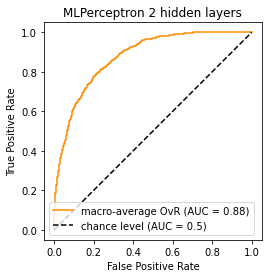

In [33]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="macro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("MLPerceptron 2 hidden layers")
plt.legend()
plt.show()